# Phase 2 - Milestones 2

# i. Perkenalan

Bab ini berisi identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

## 1.1 - Identitas

Name  : **Fadya Ulya Salsabila**

Batch : **FTDS-RMT-018**

## 1.2 - Background

Sebuah bar restoran di daerah Downtown Las Vegas bernama **Duck Vegas**, telah mengumpulkan hasil ulasan (*review*) dari konsumen atau pelanggannya. Hasil *review* ini merupakan kuesioner dari *Customer Satisfaction* atau kepuasan pelanggan. Menurut Kotler dan Keller (2009), kepuasan pelanggan merupakan suatu perasaan senang atau kecewa seseorang yang timbul karena membandingkan kinerja yang dipersepsikan produk (atau hasil) terhadap ekspektasi mereka [[1]](https://jurnalfe.ustjogja.ac.id/index.php/ekobis/article/download/303/497).

Duck Vegas akan menganalisis hasil kepuasan pelanggan untuk meningkatkan performa dan layanan restorannya. Hal ini dimaksudkan untuk terciptanya kepuasan dapat memberikan beberapa manfaat diantaranya hubungan antara perusahaan dan pelanggan menjadi harmonis, menjadi dasar bagi pembelian ulang, dan menciptakan loyalitas pelanggan serta rekomendasi dari mulut ke mulut yang menguntungkan perusahaan dalam hal ini adalah Duck Vegas. Strategi maupun langkah menciptakan Nilai Pelanggan dan Kepuasan Pelanggan adalah upaya untuk menciptakan pelanggan yang loyal terhadap restoran ini [1][[2]](http://pub.unj.ac.id/index.php/jbmk/article/view/309/297). 

Oleh karena itu, akan dilakukan analisis dan modeling NLP (*Natural Language Processing*) menggunakan *Artificial Neural Network* (ANN) untuk mengetahui jenis kata atau teks apa saja yang masuk ke dalam ulasan **suka dan tidak suka** terhadap pelayanan restoran. Sehingga Duck Vegas bisa mengimplementasikan strategi yang tepat untuk meningkatkan bisnisnya.

## 1.3 - Gambaran Dataset

Dataset berasal dari [Kaggle](https://www.kaggle.com/datasets/vigneshwarsofficial/reviews?datasetId=277570&sortBy=voteCount) yaitu `Restaurant_Reviews.tsv`. Dataset ini adalah ulasan dari 1000 pelanggannya dan memuat `2 kolom`, yaitu:

1. `Review`: berisi mengenai ulasan (*review*) pelanggan, berupa teks.
2. `Liked`: penilaian terhadap ulasan tersebut (**0=Tidak Suka** dan **1=Suka**).

## 1.4 - Objective

Tujuan dari analisis dan modeling pada data ini adalah:

1. Mengetahui karakteristik pelanggan berdasarkan label sentimen.
2. Mengetahui model terbaik untuk menganalisis dan prediksi menggunakan *Artificial Neural Network* (ANN).
3. Dapat memberikan saran yang tepat kepada perusahaan dalam meningkatkan performa bisnis.

## 1.5 - Problem Statement

Berdasarkan tujuan di atas, maka problem statement dari analisis dan modeling pada data ini adalah:

1. Apa saja karakteristik pada label sentimen?
2. Bagaimana cara yang tepat untuk menentukan model terbaik menggunakan ANN?
3. Apa saja saran yang dapat diimplementasikan oleh perusahaan untuk meningkatkan performa bisnis?

# ii. Import Libraries

Bab ini berisi semua library yang digunakan dalam project.


In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import tensorflow as tf
import re
import string

import warnings
warnings.filterwarnings('ignore')

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# For ANN: NLP Problems
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import LancasterStemmer
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU, Dropout, SpatialDropout1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
import sys
import multiprocessing
from gensim.models import Word2Vec
from gensim.corpora import WikiCorpus
from gensim.models.word2vec import LineSentence

nltk.download('stopwords')
nltk.download('punkt')

# Evaluate ANN Models
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# iii. Data Loading

Bab ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading berupa menampilkan data dan tipe data, memberi nama baru untuk beberapa kolom, mengecek ukuran dataset, serta melihat missing value.

## 3.1 - Load Data

In [ ]:
# Menampilkan data pada file tsv

data = pd.read_csv('/content/drive/MyDrive/Hacktiv8 - Fadya Ulya/phase 2/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
# Menampilkan 10 data pertama

data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [ ]:
# Menampilkan 10 data terakhir

data.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
# Duplikasi data untuk backup

df1 = data.copy()

Dari hasil tampilan data di atas, dataset `Restaurant Reviews` mempunyai `1000 baris` dan `2 kolom`.

## 3.2 - Data Info

In [ ]:
# Menampilkan info data

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


Menampilkan info data digunakan untuk mengetahui jenis data pada kolom dataset yang digunakan. Berdasarkan hasil di atas, kolom `Review` memiliki data jenis `object` dan kolom `Liked` memiliki data jenis `int64`.

## 3.3 - Duplicate Values

In [ ]:
# Menampilkan duplikasi pada baris

duplicate = df1.duplicated().sum()
print("Duplicate Rows :", duplicate)

Duplicate Rows : 4


Berdasarkan pengecekan jumlah duplikasi baris di atas, terdapat 4 baris yang sama. Oleh karena itu, dilakukan cek jenis `text` atau kalimat apa saja yang memiliki jenis yang sama dalam dataset tersebut.

In [ ]:
# Melihat duplikasi data pada baris

dup = df1[df1.duplicated()]
print(dup)

                                Review  Liked
814                 I love this place.      1
816             The food was terrible.      0
843                   I won't be back.      0
846  I would not recommend this place.      0


Hasil di atas menunjukkan bahwa terdapat 4 jenis kalimat yang sama, yaitu `I love this place.`, `The food was terrible.`, `I won't be back.`, dan `I would not recommend this place.`. Kalimat-kalimat ini akan didrop agar data memiliki 1 unique value. Hal ini didukung dengan pernyataan pada [deepchecks.com](https://deepchecks.com/what-is-data-cleaning/#:~:text=Datasets%20that%20contain%20duplicates%20may,do%20not%20exist%20in%20reality.), data yang berisi duplikat dapat mengkontaminasi data pelatihan dengan data uji atau sebaliknya. Menggunakan data yang masih terdapat duplikat dapat membuat model memiliki performa buruk bahkan tidak terdeteksi.

In [ ]:
# Drop duplikasi data

df2 = df1.drop_duplicates()

In [ ]:
# Memastikan bahwa duplikasi data sudah tidak ada

duplicate = df2.duplicated().sum()
print("Duplicate Rows :", duplicate)

Duplicate Rows : 0


Sebanyak 4 baris yang terduplikasi sudah didrop, sehingga dataset ini sudah **tidak memiliki duplikasi data**.

## 3.4 - Check Missing Values

In [ ]:
# Menampilkan missing values

mv = df2.isna().sum() # mendefinisikan missing values pada setiap kolom
print('\nJumlah missing value per kolom:\n', mv) # print mv


Jumlah missing value per kolom:
 Review    0
Liked     0
dtype: int64


Berdasarkan hasil pengecekan missing values di atas, dataset `Restaurant Reviews` tidak memiliki missing values. Hal ini menunjukkan bahwa data ini sudah bersih dari missing values dan duplikasi data. Didukung oleh pernyataan di [deepchecks.com](https://deepchecks.com/what-is-data-cleaning/#:~:text=Datasets%20that%20contain%20duplicates%20may,do%20not%20exist%20in%20reality.), bahwa jika data memiliki missing values akan membuat model salah memahami fitur, dan outlier akan merusak proses pelatihan – mengarahkan model untuk "mempelajari" pola yang tidak ada dalam kenyataan.

In [ ]:
# Menampilkan ukuran data final setelah cleaning

df2.shape

(996, 2)

Data final setelah cleaning adalah `996 baris` dan `2 kolom`.

## Kesimpulan Data Loading

1. Terdapat 4 baris (jenis kalimat) yang terduplikasi. Oleh karena itu, duplikasi tersebut didrop agar data tidak rancu saat dilakukan tahap EDA, Data Preprocessing, serta Modeling.
2. Dataset `Restaurant Reviews` sudah tidak memiliki missing values.
3. Dataset `Restaurant Reviews` final yang akan digunakan dalam tahap selanjutnya adalah `996 baris` dan `2 kolom`.

# iv. Exploratory Data Analysis (EDA)

Bab ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## 4.1 - Distribusi Data Target

Pada subbab ini, akan menampilkan jumlah dan distribusi dari data target pada dataset `Restaurant Reviews`.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

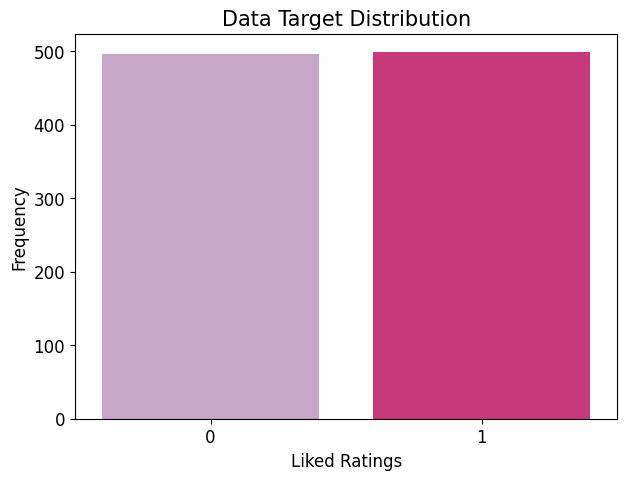

In [ ]:
# Menampilkan visualisasi data target (Liked)

plt.figure(figsize=(7,5))
ax = sns.countplot(x='Liked', data=df2, palette="PuRd")
plt.title("Data Target Distribution", fontsize=15)
plt.ylabel('Frequency', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Liked Ratings', fontsize=12)
plt.xticks(fontsize=12)

<Axes: title={'center': 'Percentage of Liked'}, ylabel='Liked'>

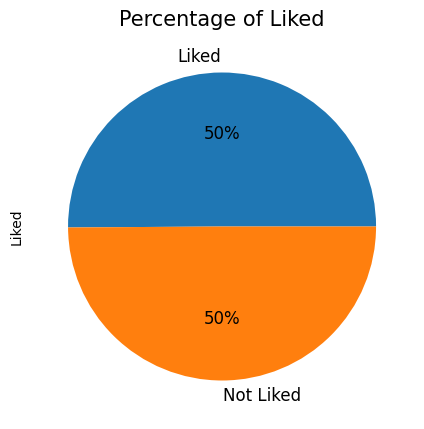

In [ ]:
# Menampilkan persentase pada kolom 'Liked'

plt.figure(figsize=(15,5))
plt.title('Percentage of Liked', fontsize=15)
df2.Liked.value_counts().plot(kind='pie', labels=['Liked', 'Not Liked'],
                              autopct='%1.0f%%', startangle= 0, textprops={'fontsize': 12})

In [ ]:
# Menghitung liked berdasarkan label 0 dan 1

df2.Liked.value_counts()

1    499
0    497
Name: Liked, dtype: int64

Hasil visualisasi dengan bar plot, pie plot, dan perhitungan pada data target di atas menunjukkan bahwa label `0 (Tidak Suka)` dan label `1 (Suka)` hanya memiliki selisih `2 review`. `Label 0` terdapat `497 reviewer` dan `label 1` terdapat `499 reviewer`. Persentase antara konsumen suka dan tidak suka dengan pelayanan restorannya adalah sama-sama `50%`.

Hal ini menunjukkan bahwa distribusi data target tersebut `seimbang (balanced)` karena antara kedua label tidak memiliki jumlah yang timpang.

## 4.2 - WordCloud

Pada subbab ini, akan melakukan visualisasi jenis kata yang sering muncul.

In [ ]:
# Mengambil kolom Review untuk melihat frekuensi kata
text = df2['Review'].tolist() 

# Menggabungkan list dan lowercase pada semua kata
text = ' '.join(text).lower()

# Mendefinisikan WordCloud
wordcloud = WordCloud(width = 1600, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(text)

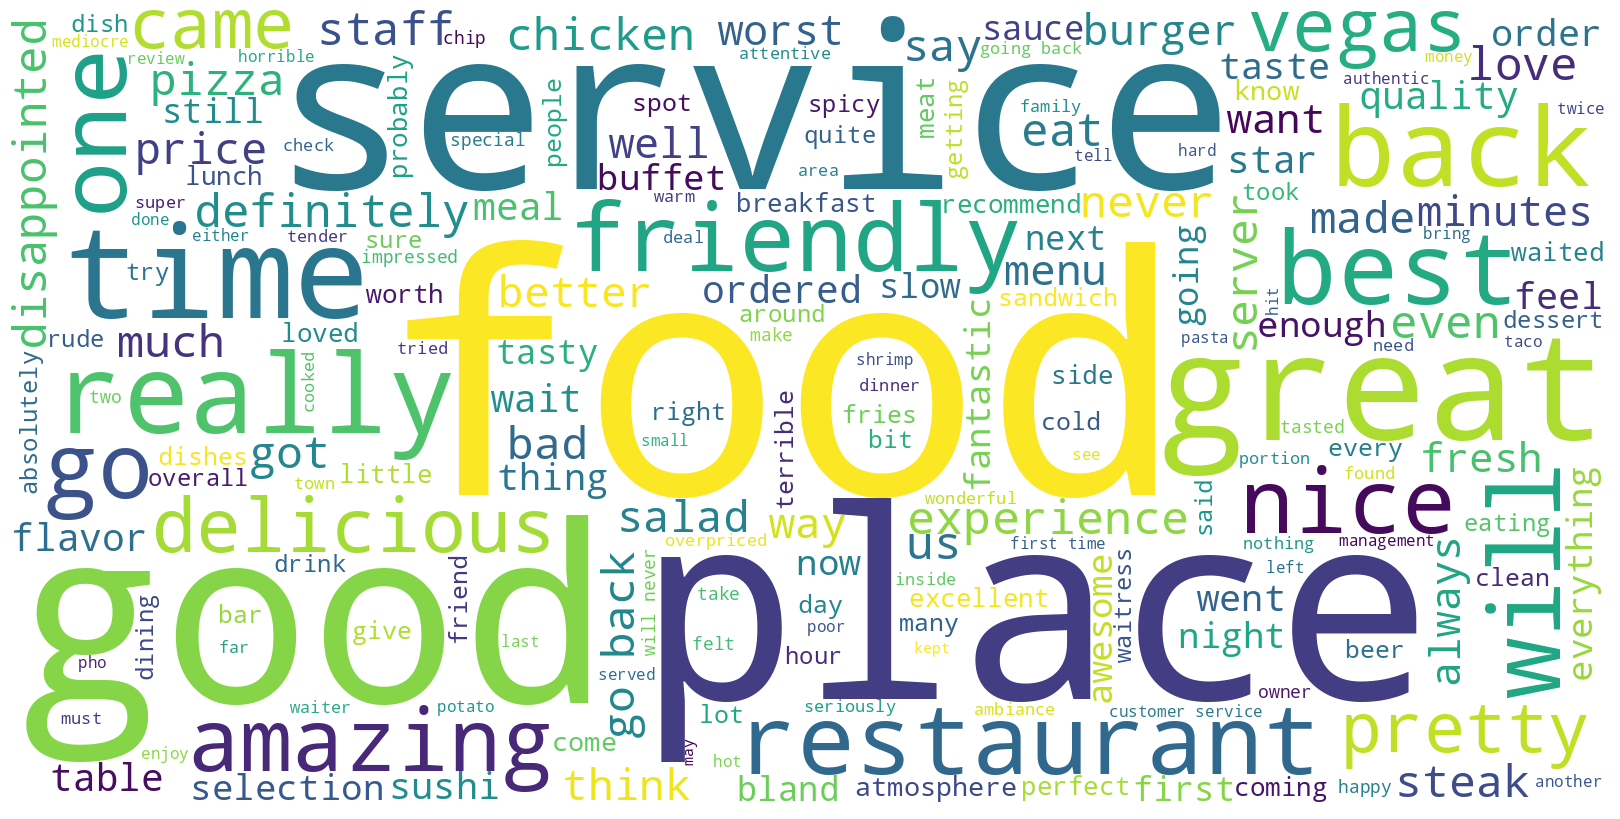

In [ ]:
# Plot gambar WordCloud

plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Hasil visualisasi gambar WordCloud di atas menunjukkan kata yang sering muncul dalam ulasan pelanggan restoran. Semakin banyak kata yang sering muncul, maka semakin besar ukuran kata dalam gambar [[3]](https://sites.unpad.ac.id/widodo/2021/03/01/membuat-wordcloud-dengan-python/).

Pada gambar di atas, ukuran teks yang paling besar adalah `place, good, food, dan service`, sedangkan untuk kata lainnya jika hanya dilihat melalui visual, tidak terlalu representatif jika dilihat melalui besar atau kecilnya ukuran. Karena tidak ada batasan besar dan kecilnya kata. Sehingga untuk memastikan kata yang sering muncul, dilakukan perhitungan 10 frekuensi kata teratas sebagai berikut.

In [ ]:
# Membuat dictionary dari frekuensi kata
text_dictionary = wordcloud.process_text(text)

# Sort dictionary
word_freq = {k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

# Menggunakan words_ untuk print hasil frekuensi kata
rel_freq = wordcloud.words_

# Print 10 frekuensi kata teratas yang sering muncul
print(list(word_freq.items())[:10])
print(list(rel_freq.items())[:10])

[('food', 126), ('place', 109), ('good', 95), ('service', 81), ('great', 70), ('time', 49), ('really', 36), ('back', 35), ('best', 30), ('will', 29)]
[('food', 1.0), ('place', 0.8650793650793651), ('good', 0.753968253968254), ('service', 0.6428571428571429), ('great', 0.5555555555555556), ('time', 0.3888888888888889), ('really', 0.2857142857142857), ('back', 0.2777777777777778), ('best', 0.23809523809523808), ('will', 0.23015873015873015)]


Berdasarkan hasil di atas, menunjukkan bahwa 10 kata yang sering muncul pada ulasan restoran ini adalah:
1. `food` disebut sebanyak 126 kali.
2. `place` disebut sebanyak 109 kali.
3. `good` disebut sebanyak 95 kali.
4. `service` disebut sebanyak 81 kali.
5. `great` disebut sebanyak 70 kali.
6. `time` disebut sebanyak 49 kali.
7. `really` disebut sebanyak 36 kali.
8. `back` disebut sebanyak 35 kali.
9. `best` disebut sebanyak 30 kali.
10. `will` disebut sebanyak 29 kali.


Berdasarkan hasil di atas, dapat disimpulkan bahwa pelanggan sering memberikan ulasan yang berkaitan dengan kata tersebut. Penjelasannya adalah:
*   Hasil di atas dapat diketahui ulasan tentang makanan (`food`) paling banyak disebut oleh pelanggan. Bar restauran Duck Vegas ini, di samping menyediakan minuman alkohol, juga menyediakan beberapa menu makanan. Dari 1000 ulasan pelanggan restoran, kata `makanan (food)` paling banyak disebut. Dimungkinkan karena pelanggan yang datang ke bar tidak hanya memesan minuman alkohol, tetapi juga memesan makananan. Perlu analisis lebih lanjut apakah makanan pada bar restoran ini tergolong enak atau tidak enak. 
*   Selain makanan, kata kedua yang sering disebut adalah tempat (`place`). Lokasi tempat yang strategis mampu meningkatkan kenyamanan pelanggan dalam menjangkau bar restoran ini.
*   Kata `good` mencadi kata ketiga yang sering muncul. Dapat diasumsikan bahwa tempat atau makanan pada Duck Vegas ini memiliki rasa yang enak dan tempat yang nyaman.
*  Selain itu, banyak disebut kata `service` yang merupakan pelayanan dari tempat ini. *Service* ini dapat merujuk ke pelayananan yang nyaman atau tidak.
*  `great` juga masuk ke dalam kata yang paling banyak disebut dalam ulasan yaitu 70 kali. Ini membuktikan bahwa pelayanan ini cukup baik karena banyal disebut dalam ulasan.
*  Kata- kata selanjutnya, seperti `time, back, best, will` dapat disimpulkan bahwa pelanggan yang puas dengan pelayananan serta makanannya, akan kembali lagi ke Duck Vegas ini.





## 4.3 - Jumlah Kata per *Review*

Pada subbab ini akan menampilkan jumlah kata pada setiap kalimat di *review* konsumen.

In [ ]:
# Membuat copy dataset untuk tambah kolom

df_words = df2.copy()

In [ ]:
# Menampilkan jumlah kata per review

df_words['word_counts'] = df2['Review'].apply(lambda x: len(str(x).split()))

df_words

,Review,Liked,word_counts
0,Wow... Loved this place.,1,4
1,Crust is not good.,0,4
2,Not tasty and the texture was just nasty.,0,8
3,Stopped by during the late May bank holiday of...,1,15
4,The selection on the menu was great and so wer...,1,12
...,...,...,...
995,I think food should have flavor and texture an...,0,12
996,Appetite instantly gone.,0,3
997,Overall I was not impressed and would not go b...,0,10
998,"The whole experience was underwhelming, and I ...",0,16


Jumlah kata per *review* ini digunakan untuk menganalisa seberapa banyak konsumen mampu memberikan komentar terhadap performa dan pelayanan restoran. Di sini kita dapat menentukan karakteristik konsumen yang memberikan ulasan `suka` dan `tidak suka`.

Berdasarkan hasil di atas, terdapat bermacam-macam jumlah kata pada setiap ulasan konsumen. Untuk memudahkan menganalisa, maka dilanjutkan dengan mengelompokkan jumlah kata berdasarkan label `suka (1)` dan `tidak suka (0)`, kemudian diurutkan dari frekuensi yang paling besar. Dalam hal ini, akan menampilkan 10 data teratas dan 10 data terbawah.

In [ ]:
# Mendefinisikan kelompok dari setiap jumlah kata berdasarkan 'Liked'

words = df_words.groupby(['word_counts', 'Liked']).size().reset_index(name='counts')
words = words.sort_values('counts', ascending=False)

# Menampilkan 10 data pertama
words.head(10)

,word_counts,Liked,counts
8,5,1,43
6,4,1,42
18,10,1,40
5,4,0,40
14,8,1,40
11,7,0,35
17,10,0,32
10,6,1,32
12,7,1,31
15,9,0,30


Hasil 10 data pertama di atas, menunjukkan bahwa konsumen yang memberikan ulasan `suka (1)` sebanyak `43 orang` dan paling banyak berkomentar sebanyak `5 kata`. Diikuti oleh konsumen yang sering berkomentar sebanyak `4 kata` ditulis oleh `42 orang`, lalu `10 kata` ditulis oleh `40 orang`.

Sedangkan konsumen yang memberikan ulasan `tidak suka (0)`, paling banyak menuliskan ulasan `4 kata` dan dituliskan oleh `40 orang`. Diikuti oleh penulisan ulasan sebanyak `7 kata` dan dituliskan oleh `35 orang`.

In [ ]:
# Menampilkan 10 data terbawah

words.head(10)

,word_counts,Liked,counts
8,5,1,43
6,4,1,42
18,10,1,40
5,4,0,40
14,8,1,40
11,7,0,35
17,10,0,32
10,6,1,32
12,7,1,31
15,9,0,30


Berdasarkan 10 data terbawah, menunjukkan bahwa konsumen yang paling sedikit memberikan ulasan `tidak suka (0)` menuliskan sebanyak `9 kata` dan ditulis oleh `30 orang`. Sedangkan pada konsumen yang memberikan ulasan `suka (1)` paling sedikit adalah sebanyak `31 orang` dengan menuliskan `7 kata`.

Untuk lebih bisa memastikan keterkaitan jumlah kata dan ulasan pelanggan, maka berikut ini akan dibuat bar plot menghitung rata-rata kata (`word_counts`) berdasarkan ulasan pelanggan (`Liked`).

### Rata-rata Kata Berdasarkan *Liked*

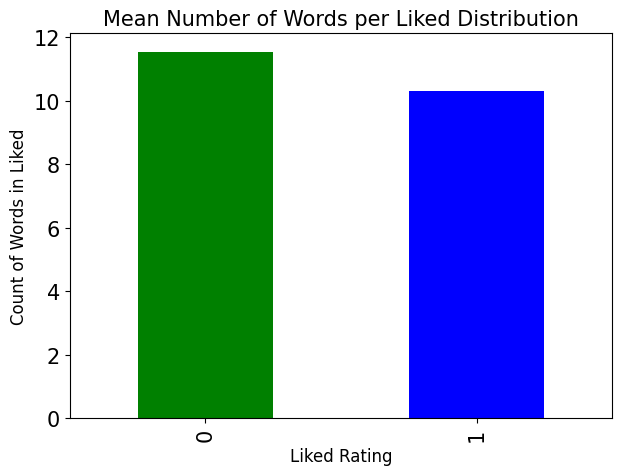

In [ ]:
# Membuat visualisasi rata-rata kata berdasarkan 'Liked

mean_words = df_words.groupby('Liked')['word_counts'].mean().plot(kind='bar', figsize=(7, 5), color=['green', 'blue'])
plt.xlabel('Liked Rating', fontsize=12)
plt.ylabel('Count of Words in Liked', fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Mean Number of Words per Liked Distribution', fontsize=15)
plt.show()

Berdasarkan hasil visualisasi di atas, menunjukkan bahwa ulasan pelanggan yang `tidak suka (0)` memiliki rata-rata penulisan jumlah kata lebih banyak dibandingkan dengan pelanggan yang memberikan ulasan `suka (1)` terhadap restoran ini.

### Kesimpulan Jumlah Kata per *Review*

Maka berdasarkan hasil perhitungan dan visualisasi `jumlah kata` di atas, dapat disimpulkan bahwa:

1. Pelanggan yang memberikan ulasan negatif (`tidak suka`), memiliki rata-rata penulisan kata lebih panjang yaitu >10 kata dibandingkan dengan ulasan positif (`suka`).
2. Pelanggan yang tidak puas biasanya memberikan rincian yang jauh lebih banyak dalam ulasannya. Hasil ini tidak jarang karena manusia memiliki kecenderungan untuk mengeluh secara detail tetapi memuji secara singkat. Hal ini juga didukung dengan pernyataan pada laman [automated marketing](https://automatedmarketinggroup.com/the-3-people-who-leave-reviews/#:~:text=People%20who%20are%20unhappy%20with,than%20people%20who%20are%20happy.), bahwa pelanggan yang tidak senang dengan pelayanannya, maka lebih sering membuat ulasan yang dibanding dengan pelanggan yang puas.

## 4.4 - Heatmap Correlation

<Axes: >

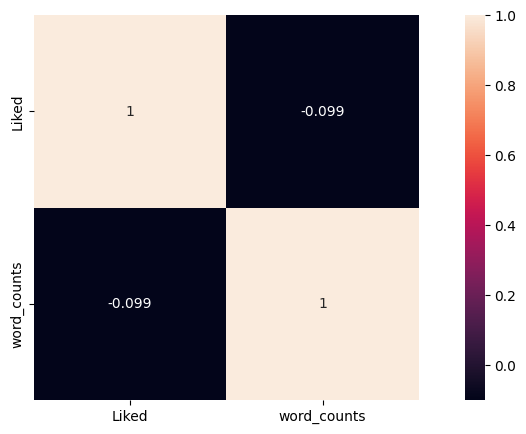

In [ ]:
# Menampilkan visualisasi heatmap correlation

fig = plt.figure(figsize = (12,5))
sns.heatmap(df_words.corr(), annot = True, square = True)

Visualisasi pada heatmap correlation ini digunakan untuk melihat hubungan antara jumlah kata (`word counts`) dengan rating (`Liked`) pelanggan terhadap restoran ini. Hasil visualisasi di atas, menunjukkan bahwa `Liked` dan `word_counts` memmiliki hubungan yang negatif dengan skor `-0.099`.

Hal ini dibuktikan dengan analisis sebelumnya, bahwa semakin banyak pelanggan yang menulis ulasan dengan kata yang banyak atau kalimat yang panjang, artinya adalah pelanggan tersebut `tidak suka (0)` atau tidak puas dengan pelayanan bar restoran. Sebaliknya, jika semakin sedikit ulasan pelanggan, maka pelanggan tersebut terindikasikan `suka (1)` terhadap pelayanan bar restoran.

## 4.5 - Frekuensi Kata

In [ ]:
# Membuat copy dataset untuk tambah kolom

df3 = df2.copy()

In [ ]:
# Menghitung jumlah karakter
df3["char_count"] = df2["Review"].map(lambda x: len(x))

# Menghitung jumlah kata
df3["word_count"] = df2["Review"].map(lambda x: len(x.split()))

# Menghitung kalimat
df3["sent_count"] = df2["Review"].map(lambda x: len(sent_tokenize(x)))

# Menghitung hashtag
df3["hashtag_count"] = df2["Review"].map(lambda x: x.count("#"))

# Rata-rata panjang kata
df3["avg_word_len"] = df2["Review"].map(lambda x: np.mean([len(w) for w in str(x).split()]))

# Rata-rata panjang kalimat
df3["avg_sent_len"] = df2["Review"].map(lambda x: np.mean([len(w.split()) for w in sent_tokenize(x)]))

df3

,Review,Liked,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
0,Wow... Loved this place.,1,24,4,2,0,5.250000,2.0
1,Crust is not good.,0,18,4,1,0,3.750000,4.0
2,Not tasty and the texture was just nasty.,0,41,8,1,0,4.250000,8.0
3,Stopped by during the late May bank holiday of...,1,87,15,1,0,4.866667,15.0
4,The selection on the menu was great and so wer...,1,59,12,1,0,4.000000,12.0
...,...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,66,12,1,0,4.583333,12.0
996,Appetite instantly gone.,0,24,3,1,0,7.333333,3.0
997,Overall I was not impressed and would not go b...,0,50,10,1,0,4.100000,10.0
998,"The whole experience was underwhelming, and I ...",0,91,16,1,0,4.750000,16.0


<Axes: xlabel='char_count', ylabel='Density'>

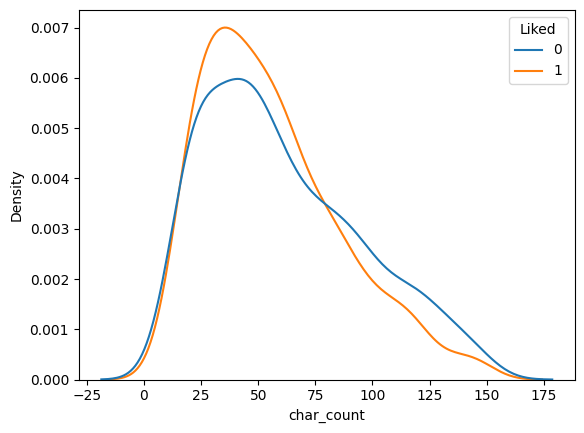

In [ ]:
# Membuat visualisasi penulisan karakter dengan KDE Plot berdasarkan data di atas

sns.kdeplot(data = df3, x = 'char_count', hue = 'Liked')

Berdasarkan visualisasi KDE plot di atas, menunjukkan bahwa pemakaian karakter pada sebuah kalimat atau kata, paling padat digunakan pada pelanggan yang memberikan ulasan `suka (1)` dibanding pelanggan yang tidak suka. Bisa dilihat dari grafik di atas, karakter mulai dari >75, adalah ulasan pelanggan yang `tidak suka (0)`.

Ini membuktikan bahwa pelanggan yang tidak puas dengan pelayanan restoran, memberikan tendesi penulisan karakter dalam kalimat lebih banyak dibanding pelanggan yang suka/puas.

<Axes: xlabel='sent_count', ylabel='Density'>

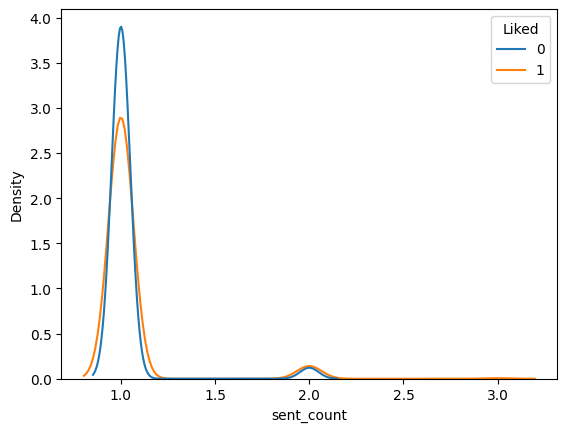

In [ ]:
# Membuat visualisasi panjang kalimat dengan KDE Plot berdasarkan data di atas

sns.kdeplot(data = df3, x = 'sent_count', hue = 'Liked')

Hasil visualisasi KDE pkot di atas menunjukkan bahwa, kepadatan penulisan ulasan satu kalimat panjang lebih banyak digunakan pada pelanggan yang memberikan ulasan `tidak suka (0)` dibandingan pelanggan yang `suka (1)`. Pelanggan yang suka/puas dengan restoran ini, biasanya menulis dua kalimat, tetapi singkat seperti `Wow... Loved this place.`.

Hal ini adalah penunjang bukti bahwa, pelanggan yang tidak puas/tidak suka dengan restoran ini akan memilih memberikan komentar yang lebih panjang kalimatnya dibanding pelanggan yang suka.

# v. Data Preprocessing

Bab ini berisi proses penyiapan data untuk proses pelatihan model, seperti text-preprocessing; pembagian data menjadi train-test, val-set, dan test-set; transformasi data (get vocabularies, text-vectorization, dan embedding); dan proses-proses lain yang dibutuhkan.

## 5.1 - Text Preprocessing

Pada subbab ini, akan dilakukan pemrosesan teks sebelum dilakukan split. Text Preprocessing ini mencakup:

1. Mengubah teks ke lowercase.
2. Menghilangkan tanda baca.
3. Menghilangkan karakter yang tidak diperlukan.
4. Menghilangkan stopwords.
5. Stemming.

### 5.1.1 - Single Document

#### Mengubah Teks ke Lowercase

Mengubah teks ke *lowercase* (huruf kecil) dimaksudkan untuk:
* membuat semua teks konsisten karena huruf kapital bisa membingungkan dan terkadang sulit untuk dipastikan penggunaannya yang tepat
* standardisasi, memudahkan perhitungan frekuensi kata karena tidak ada lagi perbedaan antara huruf kecil dan besar
* normalisasi teks, menjadi bentuk yang sama agar mudah diproses
* efisiensi komputer untuk memproses informasi

Sehingga hal ini bertujuan untuk meningkatkan akurasi dan efisiensi dalam proses pengolahan teks.

In [ ]:
# Melihat Review pertama

print(df2.Review[0])

Wow... Loved this place.


In [ ]:
# Mengubah Review ke Lowercase

review = df2.Review[0]
rev_lower = review.lower()
rev_lower

'wow... loved this place.'

#### Menghilangkan Tanda Baca

Tujuan penghilangan tanda baca pada *text preprocessing* ini karena tanda baca  tidak mengandung informasi penting tentang konten teks dan hanya berguna untuk memisahkan kata-kata atau kalimat. Sehingga dapat membantu mempercepat dalam pengolahan teks.

In [ ]:
# Menghilangkan Tanda Baca

rev_punc = rev_lower.translate(str.maketrans('', '', string.punctuation))
rev_punc

'wow loved this place'

In [ ]:
# Melihat Jenis Tanda Baca yang Dihilangkan

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### Jenis Preprocessing Lain

Preprocessing lain ditambahkan seperti:

1. Menghilangkan Hashtag.
2. Menghilangkan Enter.
3. Menghilangkan Whitespace.
4. Menghilangkan Link.
5. Menghilangkan Emoji, Simbol Matematika, dan karakter lain.
6. Menghilangkan *duplicate characters*.
7. Merapikan Spasi.

In [ ]:
# Menghilangkan Hashtag
rev_punc = re.sub("#[A-Za-z0-9_]+", " ", rev_punc)

# Menghilangkan \n
rev_punc = re.sub(r"\\n", " ", rev_punc)

# Menghilangkan Whitespace
rev_punc = rev_punc.strip()

# Menghilangkan Link
rev_punc = re.sub(r"http\S+", " ", rev_punc)
rev_punc = re.sub(r"www.\S+", " ", rev_punc)

# Menghilangkan yang Bukan Huruf seperti Emoji, Simbol Matematika (seperti μ), dst
rev_punc = re.sub("[^A-Za-z\s']", " ", rev_punc)

# Menghilangkan duplicate characters
rev_punc = re.sub("(.)\\1{2,}", "\\1", rev_punc)

# Merapikan Spaces
print('Sebelum dirapikan: ', rev_punc)
teks_punc = ' '.join(rev_punc.split())
print('Setelah dirapikan: ', teks_punc)

Sebelum dirapikan:  wow loved this place
Setelah dirapikan:  wow loved this place


Tujuan untuk menghilangkan karakter-karakter lain seperti baris *code* di atas yaitu untuk menunjang pembersihan teks sebelum digunakan untuk modeling. Sehingga hanya memuat informasi yang relevan dan dapat diolah oleh algoritma NLP dengan lebih baik. Dengan demikian, hasil analisis teks akan menjadi lebih akurat. al ini juga akan membantu dalam proses klasifikasi, kategorisasi, dan pengambilan keputusan berdasarkan hasil analisis data teks yang lebih akurat.

#### Melihat dan Menghilangkan Stopwords

In [ ]:
# Melihat jenis stopwords dalam Bahasa Inggris

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Menghilangkan Stopwords Bahasa Inggris

stopwords_eng = list(set(stopwords.words('english')))
stopwords_eng.append('i')

tokens = word_tokenize(rev_punc)
rev_stopwords = ' '.join([word for word in tokens if word not in stopwords_eng])

print('Document     : ', rev_punc)
print('Tokens       : ', tokens)
print('Clean Tokens : ', rev_stopwords)

Document     :  wow loved this place
Tokens       :  ['wow', 'loved', 'this', 'place']
Clean Tokens :  wow loved place


`Stopwords` adalah kumpulan kata-kata yang dianggap tidak memiliki nilai informasi karena kebanyakan digunakan dalam bahasa sehari-hari. 

Pada kasus ini, karena jenis reviewnya adalah Bahasa Inggris, maka penghilangan kata adalah menggunakan Bahasa Ingris. Seperti hasil pada baris *code* di atas, menunjukkan bahwa kata `'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your'` dan lain sebagainya, masuk ke dalam stopwords. Hal ini dibuktikan dengan hasil di bawah ini, terlihat bahwa kata `this` terhapus dari kalimat.

> * **Document**     :  wow loved this place
* **Tokens**       :  ['wow', 'loved', 'this', 'place']
* **Clean Tokens** :  wow loved place

Stopwords dihilangkan untuk meningkatkan kualitas dan efisiensi analisis data.

#### Stemming

Sebelumnya telah melakukan [**stemming**](https://towardsdatascience.com/stemming-corpus-with-nltk-7a6a6d02d3e5) dengan `Porter Stemmer dan Snowball Stemmer`, namun menghasilkan *stemmed tokens* yang sama. Yaitu bisa merubah arti kata dari dokumen aslinya. Seperti:

> *   **Document**      :  wow loved this place
*   **Tokens**        :  ['wow', 'loved', 'this', 'place']
*   **Clean Tokens**   :  wow loved place
*   **Stemmed Tokens** :  wow loved plac

Hal ini memengaruhi modeling, sehingga kurang representatif. Oleh karena itu, akan dilakukan **stemming** menggunakan `Lancaster Stemmer` dibanding dengan Porter Stemmer dan Snowball Stemmer.


  
  
  

In [ ]:
# Stemming
 
lanc = LancasterStemmer()
rev_stemm  = lanc.stem(rev_stopwords)

print('Document       : ', rev_punc)
print('Tokens         : ', tokens)
print('Clean Tokens   : ', rev_stopwords)
print('Stemmed Tokens : ', rev_stemm)

Document       :  wow loved this place
Tokens         :  ['wow', 'loved', 'this', 'place']
Clean Tokens   :  wow loved place
Stemmed Tokens :  wow loved place


Hasil `stemming` di atas, menunjukkan bahwa contoh hasil `Stemmed Tokens` tidak memotong huruf yang penting dalam kata sehingga makna kata masih terjaga. Dalam kasus ini, Lancaster Stemmer lebih cocok digunakan. Meskipun Lancaster Stemmer ini disebut dengan *agressive stemmer* karena di beberapa kasus, stemmer ini memotong kata yang banyak sehingga dapat menghilangkan makna kata.

### 5.1.2 - All Document

In [ ]:
# Membuat function untuk melakukan text preprocessing pada DataFrame

def text_proses(review):
  # Mengubah Review ke Lowercase
  review = review.lower()
  
  # Menghilangkan Hashtag
  review = re.sub("#[A-Za-z0-9_]+", " ", review)
  
  # Menghilangkan \n
  review = re.sub(r"\\n", " ",review)
  
  # Menghilangkan Whitespace
  review = review.strip()

  # Menghilangkan Tanda Baca
  review = review.translate(str.maketrans('', '', string.punctuation))

  # Menghilangkan Link
  review = re.sub(r"http\S+", " ", review)
  review = re.sub(r"www.\S+", " ", review)

  # Menghilangkan yang Bukan Huruf seperti Emoji, Simbol Matematika (seperti μ), dst
  review = re.sub("[^A-Za-z\s']", " ", review)

  # Menghilangkan duplicate characters
  review = re.sub("(.)\\1{2,}", "\\1", review)

  # Merapikan Spasi
  review = ' '.join(review.split())

  # Melakukan Tokenisasi
  tokens = word_tokenize(review)

  # Menghilangkan Stopwords
  review = ' '.join([word for word in tokens if word not in stopwords_eng])
  
  # Melakukan Stemming
  review = lanc.stem(review)
  
  return review

In [ ]:
# Copy dataframe untuk save model baru

df_final = df2.copy()

In [ ]:
# Mengaplikasikan semua preprocessing ke dalam DataFrame

df_final['text_processed'] = df2['Review'].apply(lambda x: text_proses(x))
df_final

,Review,Liked,text_processed
0,Wow... Loved this place.,1,wow loved place
1,Crust is not good.,0,crust good
2,Not tasty and the texture was just nasty.,0,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,selection menu great prices
...,...,...,...
995,I think food should have flavor and texture an...,0,think food flavor texture lacking
996,Appetite instantly gone.,0,appetite instantly gon
997,Overall I was not impressed and would not go b...,0,overall impressed would go back
998,"The whole experience was underwhelming, and I ...",0,whole experience underwhelming think well go n...


Setelah melakukan pembersihan kata (`text preprocessing`), maka hasil tersebut digabungkan menjadi satu dan dibuat kolom baru untuk melihat perbedaan sebelum dan sesudah pembersihan kata.

Setelah itu, akan dilakukan Exploratory Data Analysis (EDA) kembali, untuk melihat perbedaan distribusi kata dan sentimen.

### 5.1.3 - EDA After Preprocessing

#### 5.1.3.1 - WordCloud

In [ ]:
# Mendefinisikan stopwords
comment_words = ''
stopwords1 = set(STOPWORDS)

# Iterate through the tsv file
for val in df_final.text_processed:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

# Mendefinisikan WordCloud
wordcloud_after = WordCloud(width = 1600, height = 800,
                            background_color ='white',
                            stopwords = stopwords1,
                            min_font_size = 10).generate(comment_words)

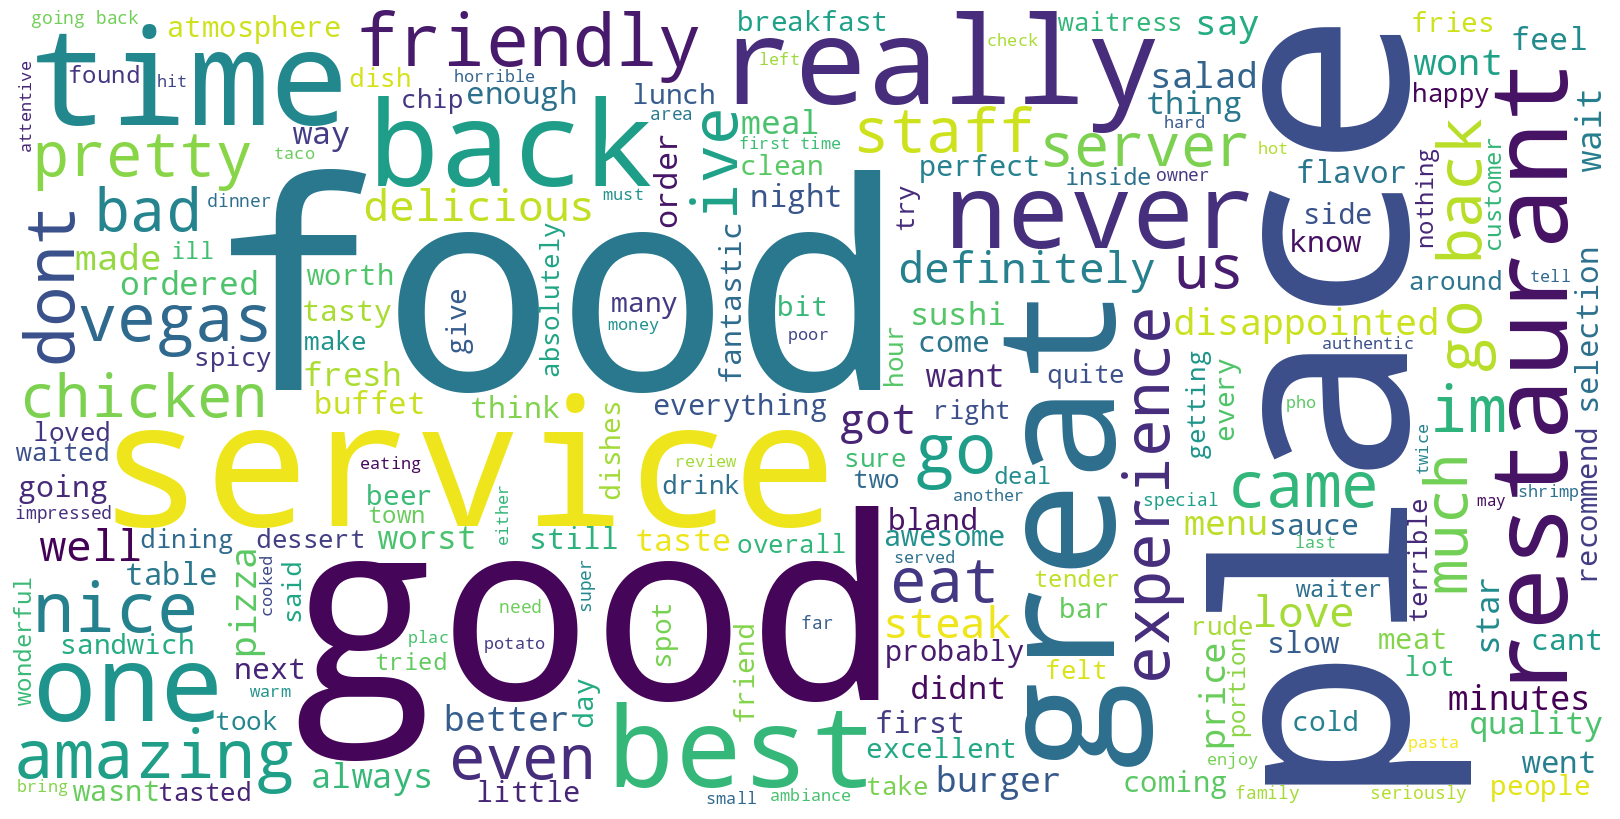

In [ ]:
# Plot gambar WordCloud after preprocessing

plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud_after)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
# Membuat dictionary dari frekuensi kata
text_dictionary1 = wordcloud_after.process_text(text)

# Sort dictionary
word_freq1 = {k: v for k, v in sorted(text_dictionary1.items(),reverse=True, key=lambda item: item[1])}

# Menggunakan words_ untuk print hasil frekuensi kata
rel_freq1 = wordcloud_after.words_

# Print 10 frekuensi kata teratas yang sering muncul
print(list(word_freq1.items())[:10])
print(list(rel_freq1.items())[:10])

[('food', 126), ('place', 109), ('good', 95), ('service', 81), ('great', 70), ('time', 49), ('really', 36), ('back', 35), ('best', 30), ('will', 29)]
[('food', 1.0), ('place', 0.8306451612903226), ('good', 0.7661290322580645), ('service', 0.6451612903225806), ('great', 0.5483870967741935), ('time', 0.3548387096774194), ('really', 0.2903225806451613), ('back', 0.27419354838709675), ('best', 0.24193548387096775), ('restaurant', 0.21774193548387097)]


Hasil `WordCloud` setelah preprocessing, menunjukkan adanya perubahan kata dan jumlah kata tersebut, yang sering muncul dalam ulasan pelanggan. Pada visualisasi gambar WordCloud, juga ditemukan kata-kata baru yang muncul dengan ukuran teks lebih besar. Sepuluh kata yang sering muncul setelah dilakukan pembersihan teks tidak ada perbedaan.



#### 5.1.3.2 - Jumlah Kata per *Review*

In [ ]:
# Membuat copy dataset untuk tambah kolom untuk melihat kata setelah preprocessing

df_words_after = df_final.copy()

In [ ]:
# Menampilkan jumlah kata per review di text_processed

df_words_after['word_counts_after'] = df_final['text_processed'].apply(lambda x: len(str(x).split()))
df_words_after

,Review,Liked,text_processed,word_counts_after
0,Wow... Loved this place.,1,wow loved place,3
1,Crust is not good.,0,crust good,2
2,Not tasty and the texture was just nasty.,0,tasty texture nasty,3
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...,9
4,The selection on the menu was great and so wer...,1,selection menu great prices,4
...,...,...,...,...
995,I think food should have flavor and texture an...,0,think food flavor texture lacking,5
996,Appetite instantly gone.,0,appetite instantly gon,3
997,Overall I was not impressed and would not go b...,0,overall impressed would go back,5
998,"The whole experience was underwhelming, and I ...",0,whole experience underwhelming think well go n...,10


In [ ]:
# Mendefinisikan kelompok dari setiap jumlah kata berdasarkan 'Liked'

words1 = df_words_after.groupby(['word_counts_after', 'Liked']).size().reset_index(name='counts')
words1 = words1.sort_values('counts', ascending=False)

# Menampilkan 5 data pertama
words1.head(5)

,word_counts_after,Liked,counts
5,3,1,84
4,3,0,77
7,4,1,77
3,2,1,60
8,5,0,57


In [ ]:
# Menampilkan 5 data terakhir
words1.tail(5)

,word_counts_after,Liked,counts
30,16,0,1
31,16,1,1
32,17,0,1
33,17,1,1
34,18,0,1


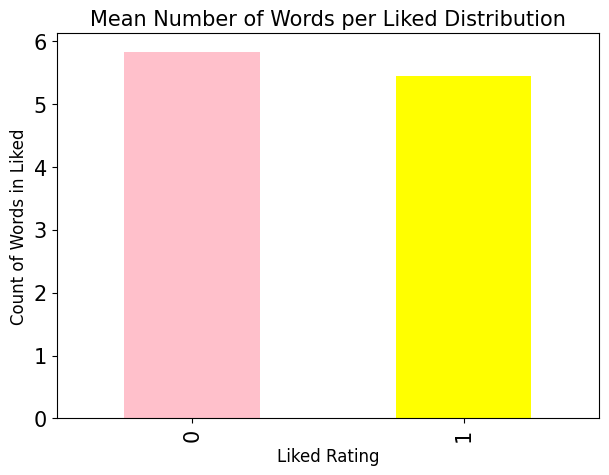

In [ ]:
# Membuat visualisasi rata-rata kata setelah preprocessing berdasarkan 'Liked

mean_words_after = df_words_after.groupby('Liked')['word_counts_after'].mean().plot(kind='bar', figsize=(7, 5), color=['pink', 'yellow'])
plt.xlabel('Liked Rating', fontsize=12)
plt.ylabel('Count of Words in Liked', fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Mean Number of Words per Liked Distribution', fontsize=15)
plt.show()

Berdasarkan hasil visualisasi jumlah kata berdasarkan *review*, memiliki kesimpulan yang sama dengan EDA sebelum *preprocessing*. Terlihat bahwa pelanggan yang memberikan ulasan negatif (`tidak suka`), memiliki rata-rata penulisan kata lebih panjang dibandingkan dengan ulasan positif (`suka`).

Perbedaannya adalah, pada EDA sebelum preprocessing, rata-rata ulasan negatif (`0`) adalah >10 kata. Sedangkan pada EDA setelah preprocessing, ulasan negatif adalah sebanyak >5 kata.

#### 5.1.3.2 - Frekuensi Kata

In [ ]:
# Mendefinisikan stopwords

top = set(stopwords.words("english"))
corpus = [word for i in df_final["text_processed"].str.split().values.tolist() for word in i if (word not in stop)]

In [ ]:
# Menampilkan kata yang sering muncul

from collections import Counter
most_common = Counter(corpus).most_common(10)

<Axes: >

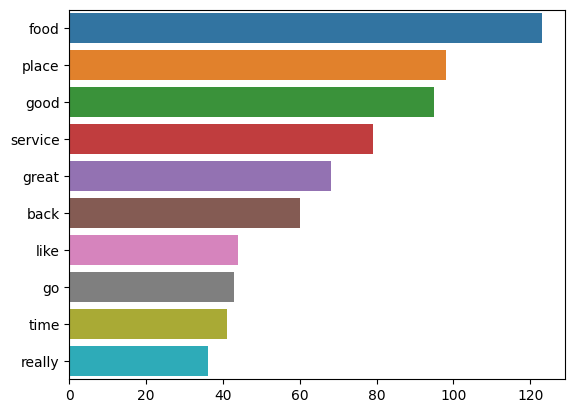

In [ ]:
# Membuat visualisasi kata yang sering muncul

words, frequency = [], []
for word, count in most_common:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)

Berdasarkan hasil visualisasi frekuensi kata yang sering muncul, menunjukkan bahwa kata terbanyak yang sering muncul adalah makanan (`food`). Hal ini menunjukkan bahwa pelanggan Duck Vegas, ada yang cocok dengan makanannya dan ada yang tidak. Hal ini ditunjukkan pada *review* satuan pelanggan.

Selain itu, kata tempat (`place`) dan pujian bagus (`good`) adalah kata yang sering muncul juga. Hal ini menunjukkan bahwa pelayanan dan tempat dari Duck Vegas dapat diasumsikan masuk dalam kategori baik. Kata kembali (`back`) dan (`go`) juga sebagai kata pendukung yang menunjukkan bahwa pengunjung akan kembali lagi ke Duck Vegas.

## 5.2 - Melihat Data Target

In [ ]:
# Melihat Target

df_final.Liked.unique()

array([1, 0])

In [ ]:
# Melihat Persebaran Target

df_final['Liked'].value_counts()

1    499
0    497
Name: Liked, dtype: int64

Data persebaran target adalah seimbang. Sebanyak 499 pelanggan suka (`1`) dengan restoran dan 497 pelanggan tidak suka (`0`) dengan restorannya.

## 5.3 - Split Between Features and Target

In [ ]:
# Split antara `X` dan `y`
# `y` (target) adalah Liked

X = df_final.drop(['Liked', 'Review'], axis=1).to_numpy() # features
y = df_final['Liked'].to_numpy() # target
X

array([['wow loved place'],
       ['crust good'],
       ['tasty texture nasty'],
       ['stopped late may bank holiday rick steve recommendation lov'],
       ['selection menu great prices'],
       ['getting angry want damn pho'],
       ['honeslty didnt taste fresh'],
       ['potatoes like rubber could tell made ahead time kept warmer'],
       ['fries great'],
       ['great touch'],
       ['service prompt'],
       ['would go back'],
       ['cashier care ever say still ended way overpriced'],
       ['tried cape cod ravoli chicken cranberrym'],
       ['disgusted pretty sure human hair'],
       ['shocked signs indicate cash'],
       ['highly recommended'],
       ['waitress little slow service'],
       ['place worth time let alone vegas'],
       ['lik'],
       ['burrittos blah'],
       ['food amazing'],
       ['service also cut'],
       ['could care less interior beautiful'],
       ['perform'],
       ['thats rightthe red velvet cakeoh stuff good'],
       ['never br

Feature yang digunakan adalah kolom hasil *text-preprocessing*, yaitu hanya kolom `text_processed` saja.

## 5.4 - Split Between Train-Set, Val-Set, and Test-Set

In [ ]:
# Split antara Train-Set, Val-Set, dan Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=30)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (636, 1)
Val Size :  (160, 1)
Test Size :  (200, 1)


Split antara `Train-Set, Validation-set, dan Test-Set` menghasilkan:

1. `Train-Set`: 636 baris dan 1 kolom.
2. `Validation-Set`: 160 baris dan 1 kolom.
3. `Test-Set`: 200 baris dan 1 kolom.

## 5.5 - Get Vocabularies

In [ ]:
# Mengubah shape ke (n,)

X_train_arr = X_train.flatten()
X_val_arr = X_val.flatten()
X_test_arr = X_test.flatten()

print('Train Size : ', X_train_arr.shape)
print('Val Size : ', X_val_arr.shape)
print('Test Size : ', X_test_arr.shape)

Train Size :  (636,)
Val Size :  (160,)
Test Size :  (200,)


In [ ]:
# Get Vocabularies

Vectorize = CountVectorizer()

X_train_vec = Vectorize.fit_transform(X_train_arr)
X_val_vec = Vectorize.transform(X_val_arr)
X_test_vec = Vectorize.transform(X_test_arr)

X_train_vec

<636x1492 sparse matrix of type '<class 'numpy.int64'>'
	with 3535 stored elements in Compressed Sparse Row format>

In [ ]:
# Mencari Jumlah Vocab dan Panjang Token dalam Satu Document

sum_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train_arr])

print("Jumlah Vocabulary: ", sum_vocab)
print("Panjang Maksimum Kalimat: ", max_sen_len, "kata")

Jumlah Vocabulary:  1492
Panjang Maksimum Kalimat:  17 kata


Berdasarkan hasil `Get Vocabularies` di atas, menunjukkan bahwa ulasan pelanggan pada Duck Vegas terdapat `1492` kata kerja dengan maksimal kalimat ada `17 kalimat`.

*Get vocabulary* digunakan untuk identifikasi kata penting dalam suatu bahasa yang akan digunakan sebagai dasar analisis dan pemrosesan teks. Selain itu, *get vocabulary* juga digunakan untuk membersihkan dan membuang kata-kata yang tidak relevan dalam proses pemrosesan teks, seperti tanda baca, stopword, dan kata-kata dengan frekuensi rendah yang tidak signifikan dalam analisis.

## 5.6 - Text Vectorization

`Text Vectorization` bertujuan untuk merubah tipe data string ke dalam bentuk numerik. Dalam kasus NLP hal ini digunakan untuk memudahkan saat membangun model. Penggunaan metode ini, menggunakan token maksimal (`max_tokens`) dengan jumlah vocabulary unik (`sum_vocab`) pada ulasan pelanggan.

In [ ]:
# Text Vectorization

text_vectorization = TextVectorization(max_tokens=sum_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)
                                       )

text_vectorization.adapt(X_train_arr)

In [ ]:
# Melihat Text Vectorization

## Contoh Document
print('Contoh Document')
print(df2.text_processed[0])
print('')

## Hasil Text Vectorization
print('Hasil Text Vectorization')
print(text_vectorization([df2.text_processed[0]]))
print('Ukuran Vector : ', text_vectorization([df2.text_processed[0]]).shape)

Contoh Document
wow loved place

Hasil Text Vectorization
tf.Tensor([[307 195   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0]], shape=(1, 17), dtype=int64)
Ukuran Vector :  (1, 17)


Berdasarkan hasil di atas, menunjukkan bahwa kalimat ulasan pertama yaitu `wow loved place`, memiliki ukuran vector yaitu 1, 17.

Berikut adalah `20 token` berdasarkan frekuensi kemunculan paling banyak. Kata-kata ini sering muncul dalam keluhan dan ulasan pelanggan pada Duck Vegas.

In [ ]:
# Menampilkan Top 20 Token (Diurutkan Berdasarkan Frekuensi Kemunculan Terbesar)

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'food',
 'place',
 'good',
 'service',
 'great',
 'back',
 'time',
 'like',
 'go',
 'really',
 'best',
 'also',
 'restaurant',
 'never',
 'would',
 'dont',
 'amazing',
 'friendly']

## 5.7 - Embedding

[Word embeddings](https://mti.binus.ac.id/2020/11/17/word-embedding-dengan-word2vec/#:~:text=Word%20embeddings%20adalah%20proses%20konversi,pada%20space%20dengan%20dimensi%20tertentu.) adalah proses konversi kata yang berupa karakter alphanumeric kedalam bentuk vector. Setiap kata adalah vector yang merepresentasikan sebuah titik pada space dengan dimensi tertentu.

In [ ]:
# Embedding

embedding = Embedding(input_dim=sum_vocab,
                      output_dim=64,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

Dalam proses embbeding ini, digunakan dimensi input (`input_dim`) sebanyak jumlah vocabulary (`sum_vocab`). Sedangkan [output_dim](https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce) atau panjang dari vector setiap kata, menggunakan 64.

In [ ]:
# Melihat Hasil Embedding

## Contoh Document
print('Contoh Document')
print(df2.text_processed[0])
print('')

## Hasil Text Vectorization
print('Hasil Text Vectorization')
print(text_vectorization([df2.text_processed[0]]))
print('Ukuran vector : ', text_vectorization([df2.text_processed[0]]).shape)
print('')

## Hasil Embedding
print('Hasil Embedding')
print(embedding(text_vectorization([df2.text_processed[0]])))
print('Ukuran vector : ', embedding(text_vectorization([df2.text_processed[0]])).shape)

Contoh Document
wow loved place

Hasil Text Vectorization
tf.Tensor([[307 195   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0]], shape=(1, 17), dtype=int64)
Ukuran vector :  (1, 17)

Hasil Embedding
tf.Tensor(
[[[ 0.03446991 -0.03580384 -0.0444997  ... -0.03821539  0.01889405
    0.0163146 ]
  [-0.0303842  -0.02420506  0.02075945 ...  0.00735826 -0.04714835
   -0.01594852]
  [ 0.01615239  0.04975219  0.03852947 ...  0.03407656 -0.01643286
    0.01032903]
  ...
  [-0.02174072  0.04502887  0.04343934 ... -0.01332032  0.00530621
    0.04695756]
  [-0.02174072  0.04502887  0.04343934 ... -0.01332032  0.00530621
    0.04695756]
  [-0.02174072  0.04502887  0.04343934 ... -0.01332032  0.00530621
    0.04695756]]], shape=(1, 17, 64), dtype=float32)
Ukuran vector :  (1, 17, 64)


Hasil dari embedding, menunjukkan bahwa kalimat `wow loved place` memiliki ukuran vector (1, 17, 64).

## 5.8 -  Pipeline With TensorFlow



In [ ]:
# Create a training, validation, and test Dataset pipelines, slice, and shuffle
def df_to_dataset(features, labels, shuffle=True, batch_size=32):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(features))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

train_pipe = df_to_dataset(X_train, y_train, batch_size=64)
val_pipe = df_to_dataset(X_val, y_val, shuffle=False, batch_size=64)
test_pipe = df_to_dataset(X_test, y_test, shuffle=False, batch_size=64)

In [ ]:
# Check How Many Batch Groups

print('Number of Batch - Train : ', tf.data.experimental.cardinality(train_pipe).numpy())
print('Number of Batch - Valid : ', tf.data.experimental.cardinality(val_pipe).numpy())
print('Number of Batch - Test  : ', tf.data.experimental.cardinality(test_pipe).numpy())

Number of Batch - Train :  10
Number of Batch - Valid :  3
Number of Batch - Test  :  4


Pada modeling ini, menggunakan batch `Train` sebanyak 10, `Validation` sebanyak 3, dan `Test` sebanyak 4.

# vi. Model Definition

Bab ini berisi cell untuk mendefinisikan model. Serta berisi alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## Sequential API: LSTM

Algoritma pada modeling ini menggunakan Artificial Neural Network (ANN) dengan salah satu Arsitektur RNN yaitu Long Short-term Memory (LSTM) untuk memprediksi kalimat ulasan yang salah prediksi pada Duck Vegas bar restaurant.

[Algoritma](https://openlibrarypublications.telkomuniversity.ac.id/index.php/engineering/article/view/14318/14102) ini memiliki mekanisme internal yang disebut *gates* atau gerbang yang dapat mengatur aliran informasi. Gerbang ini  dapat  mempelajari  data  mana  yang  penting  untuk  disimpan  atau  yang  perlu  dilupakan  dalam  sebuah sequence. Algoritma  LSTM  menggunakan memory  cellyang  dapatbekerja  lebih  baik  dibanding  dengan jaringan  saraf  rekuren  biasa.Algoritma  LSTM juga biasa  digunakan  untuk  prediksi  dan  klasifikasi.

In [ ]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Mendefinisikan Model Sequential dengan LSTM

model_seq = Sequential()
model_seq.add(text_vectorization)
model_seq.add(embedding)
model_seq.add(LSTM(16,
                   return_sequences=True))
model_seq.add(LSTM(16))
model_seq.add(Dense(1,
                    activation='sigmoid'))

# Compile
model_seq.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics='accuracy')

model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 17)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 17, 64)            95488     
                                                                 
 lstm (LSTM)                 (None, 17, 16)            5184      
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 102,801
Trainable params: 102,801
Non-trainable params: 0
__________________________________________________

Pada kasus ini, LSTM adalah metode yang cocok dalam membuat prediksi dan klasifikasi. Untuk base model, menggunakan Model Sequential dengan LSTM dengan menambahkan layer `text_vectorization, embedding` serta `lstm: 16 layers, lstm_1: 16 layers` dan `dense` sebagai output layer sebanyak `1`.

Activation output layer menggunakan `sigmoid`, karena activation ini cocok digunakan pada klasifikasi binary. Dan optimizer yang digunakan `sgd` karena sgd dapat meberikan performa yang baik pada data train dan test.

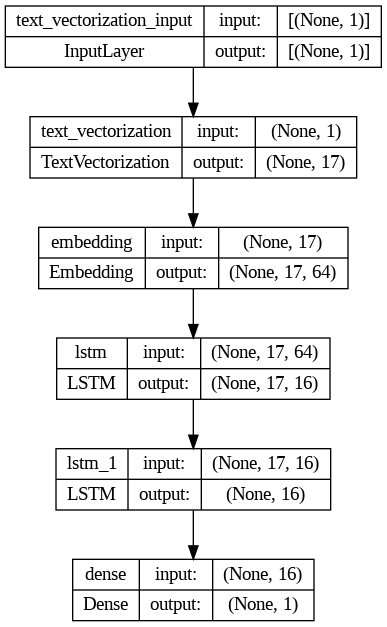

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_seq, show_shapes=True)

# vii. Model Training

Bab ini hanya berisi code untuk melatih model dan output yang dihasilkan. Analisis dan narasi hasil ini pada bagian Model Evaluation.

## 7.1 - Sequential API: LSTM

### 7.1.1 - Sequential API LSTM: Model 1 (Baseline)

Pada baseline model LSTM, menggunakan epochs `30`.

In [ ]:
# Train the model LSTM

%%time
model_lstm_seq1 = model_seq.fit(train_pipe,
                                epochs=30,
                                validation_data=(val_pipe))

Epoch 1/30
10/10 [==============================] - 5s 118ms/step - loss: 0.6943 - accuracy: 0.4874 - val_loss: 0.6921 - val_accuracy: 0.5125
Epoch 2/30
10/10 [==============================] - 0s 23ms/step - loss: 0.6936 - accuracy: 0.4874 - val_loss: 0.6923 - val_accuracy: 0.5125
Epoch 3/30
10/10 [==============================] - 0s 23ms/step - loss: 0.6930 - accuracy: 0.4937 - val_loss: 0.6925 - val_accuracy: 0.5312
Epoch 4/30
10/10 [==============================] - 0s 23ms/step - loss: 0.6927 - accuracy: 0.5063 - val_loss: 0.6926 - val_accuracy: 0.5188
Epoch 5/30
10/10 [==============================] - 0s 23ms/step - loss: 0.6923 - accuracy: 0.5377 - val_loss: 0.6928 - val_accuracy: 0.5312
Epoch 6/30
10/10 [==============================] - 0s 25ms/step - loss: 0.6918 - accuracy: 0.6053 - val_loss: 0.6930 - val_accuracy: 0.5562
Epoch 7/30
10/10 [==============================] - 0s 22ms/step - loss: 0.6916 - accuracy: 0.5409 - val_loss: 0.6930 - val_accuracy: 0.4875
Epoch 8/30
1

In [ ]:
# Create DataFrame

history_seq_df = pd.DataFrame(model_lstm_seq1.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.694300,0.487421,0.692118,0.51250
1,0.693628,0.487421,0.692283,0.51250
2,0.693035,0.493711,0.692461,0.53125
3,0.692663,0.506289,0.692649,0.51875
4,0.692290,0.537736,0.692819,0.53125
5,0.691825,0.605346,0.692954,0.55625
6,0.691557,0.540881,0.693046,0.48750
7,0.691317,0.575472,0.693181,0.47500
8,0.690972,0.514151,0.693259,0.47500
9,0.690775,0.509434,0.693309,0.47500


Berdasarkan hasil perhitungan `epochs` di atas, menunjukkan bahwa hasil `accuracy` pada data train mengalami kenaikan, penurunan, lalu stagnan. Dengan skor teraksih masing-masing adalah:
* `loss`: 0.685014
* `val_loss`: 0.692204
* `accuracy`: 0.509434
* `val_accuracy`: 0.47500

<Axes: >

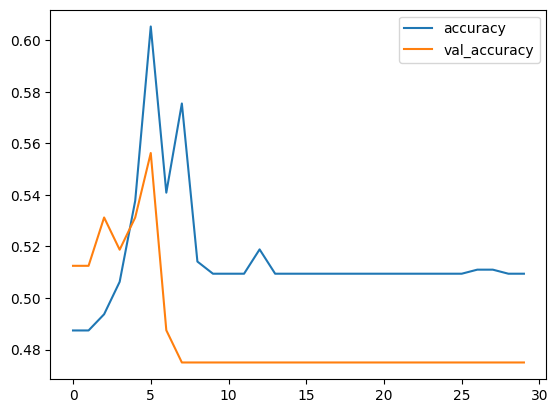

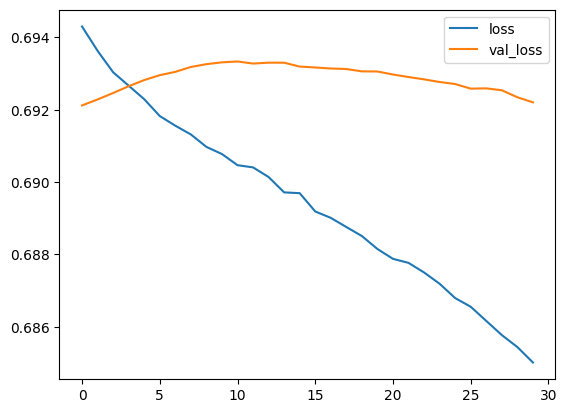

In [ ]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

Berdasarkan visualisasi grafik di atas, menunjukkan bahwa `LSTM Baseline` memiliki model yang overfit pada `accuracy` serta underfit pada `loss`.

### 7.1.2 - Sequential API LSTM: Model 2 (Improvement)

In [ ]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Mendefinisikan Model Sequential dengan LSTM

model_seq2 = Sequential()
model_seq2.add(text_vectorization)
model_seq2.add(embedding)
model_seq2.add(tf.keras.layers.Bidirectional(LSTM(32, return_sequences=True)))
model_seq2.add(tf.keras.layers.Bidirectional(LSTM(16)))
model_seq2.add(Dense(1, 
                     activation='sigmoid'))
# Compile
model_seq2.compile(loss='binary_crossentropy',
                   optimizer='sgd',
                   metrics='accuracy')

model_seq2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 17)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 17, 64)            95488     
                                                                 
 bidirectional (Bidirectiona  (None, 17, 64)           24832     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                        

Model Sequential API: LSTM dengan Improvement, menggunakan layer `text_vectorization dan embedding`. Layer LSTM yang digunakan adalah `Bidirectional` dengan jumlah layer 32 dan 16. Serta `output layer/Dense` sebanyak 1.

[Bidirectional LSTM (BiLSTM)](https://ojs.unikom.ac.id/index.php/jamika/article/download/7764/3278#:~:text=Bidirectional%20LSTM%20(BiLSTM)%20merupakan%20metode,maka%20akan%20meningtkat%20performa%20algoritmanya.) merupakan metode LSTM yang telah dikembangkan, dimana BiLSTM dapat menangkap informasi dari dua arah. Metode BiLSTM ini semakin banyak data maka akan meningtkat performa algoritmanya.

Sehingga pada kasus Duck Vegas ini, akan meningkatkan performa model menggunakan Bidirectional. Pemilihan jumlah layer 32 sebagai layer pertama, dipilih karena jumlah layer harus lebih besar dari pada input. Sedangkan pemilihan jumlah layer 16 sebagai layer kedua, dipilih karena layer mendekati output, sehingga harus semakin kecil.

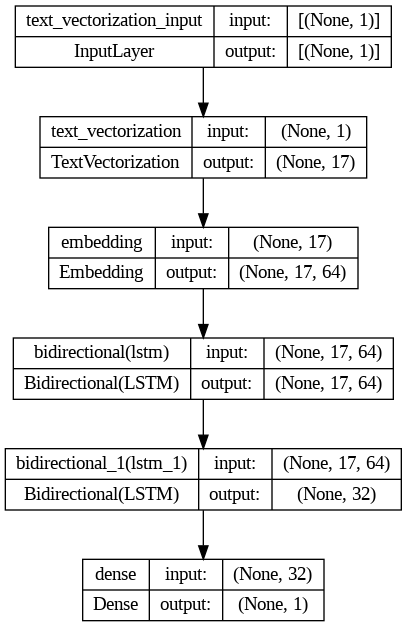

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_seq2, show_shapes=True)

In [ ]:
# Train the model LSTM Model 2
%%time

model_lstm_seq2 = model_seq2.fit(train_pipe,
                                 epochs=80,
                                 validation_data=(val_pipe))

Epoch 1/80
10/10 [==============================] - 9s 237ms/step - loss: 0.6949 - accuracy: 0.3789 - val_loss: 0.6933 - val_accuracy: 0.4875
Epoch 2/80
10/10 [==============================] - 0s 35ms/step - loss: 0.6944 - accuracy: 0.3915 - val_loss: 0.6933 - val_accuracy: 0.4938
Epoch 3/80
10/10 [==============================] - 0s 40ms/step - loss: 0.6939 - accuracy: 0.4544 - val_loss: 0.6932 - val_accuracy: 0.5063
Epoch 4/80
10/10 [==============================] - 0s 36ms/step - loss: 0.6934 - accuracy: 0.5346 - val_loss: 0.6932 - val_accuracy: 0.5562
Epoch 5/80
10/10 [==============================] - 0s 39ms/step - loss: 0.6931 - accuracy: 0.5142 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/80
10/10 [==============================] - 0s 35ms/step - loss: 0.6925 - accuracy: 0.5833 - val_loss: 0.6931 - val_accuracy: 0.4812
Epoch 7/80
10/10 [==============================] - 0s 39ms/step - loss: 0.6921 - accuracy: 0.5157 - val_loss: 0.6930 - val_accuracy: 0.4812
Epoch 8/80
1

In [ ]:
# Create DataFrame

history_seq2_df = pd.DataFrame(model_lstm_seq2.history)
history_seq2_df

,loss,accuracy,val_loss,val_accuracy
0,0.696932,0.490566,0.693377,0.51875
1,0.696032,0.490566,0.693362,0.51250
2,0.695403,0.490566,0.693369,0.53125
3,0.694749,0.490566,0.693383,0.52500
4,0.694219,0.470126,0.693392,0.51875
...,...,...,...,...
65,0.662784,0.748428,0.685669,0.50625
66,0.661947,0.803459,0.685469,0.51250
67,0.661150,0.806604,0.685251,0.51250
68,0.660351,0.817610,0.685042,0.51250


Hasil data di atas, adalah hasil data pemilihan `epochs` sebanyak 70 kali. Menghasilkan skor data terakhir sebagai berikut:

* `loss`: 0.659426
* `val_loss`: 0.684838
* `accuracy`: 0.834906
* `val_accuracy`: 0.51250

<Axes: >

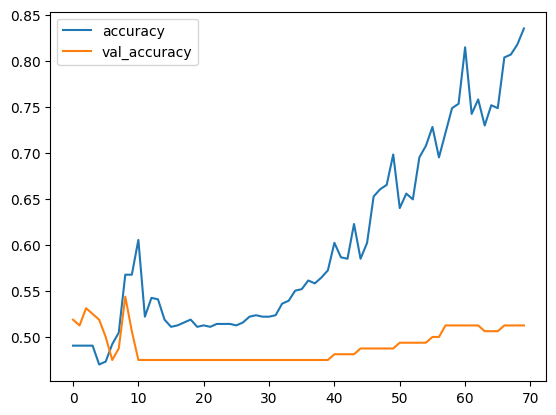

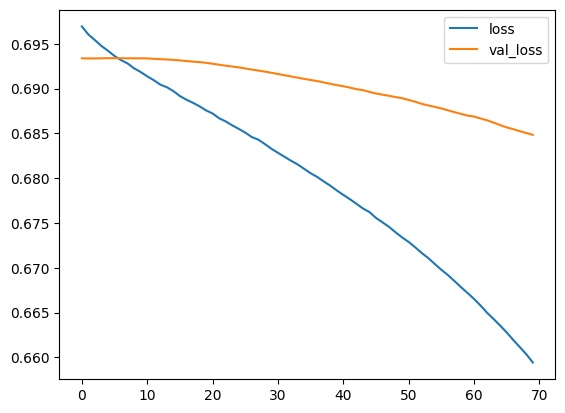

In [ ]:
# Plot Training Results

history_seq2_df[['accuracy', 'val_accuracy']].plot()
history_seq2_df[['loss', 'val_loss']].plot()

Berdasarkan visualisasi grafik di atas, menunjukkan bahwa `LSTM Improvement` memiliki model yang overfit pada `accuracy` serta underfit pada `loss`. Namun, Model pada Improvement ini memiliki skor `accuracy` lebih tinggi dan skor `loss` lebih rendah dibandingkan dengan Baseline Model.

## 7.2 - Best Model

Berdasarkan hasil modeling di atas, menunjukkan bahwa Model pada Improvement ini memiliki skor `accuracy` lebih tinggi yaitu `83%` dan skor `loss` lebih rendah yaitu `65%` dibandingkan dengan Baseline Model.

Hal ini dapat dikatakan bahwa Model Improvement adalah model terbaik. Namun perlu dilakukan evaluasi model lebih lanjut, untuk membandingkan antara keduanya.

# viii. Model Evaluation

Bab ini berisi evaluasi model yang menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Pada bab ini dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Serta analisis terkait dengan hasil pada model.

## 8.1 - Train Set

In [ ]:
# Prediksi `y` pada train-set menggunakan Sequential API Model: LSTM Baseline dan Improvement

y_pred_train_lstsm1 = model_seq.predict(X_train_arr)
y_pred_train_lstm2 = model_seq2.predict(X_train_arr)

20/20 [==============================] - 0s 9ms/step


In [ ]:
# Mengkonversi y_pred ke dalam kelas 1,0 atau kelas 0 menggunakan numpy

y_pred_train_lstsm1 = np.where(y_pred_train_lstsm1 >= 0.5, 1, 0)
y_pred_train_lstm2  = np.where(y_pred_train_lstm2  >= 0.5, 1, 0)

In [ ]:
# Evaluasi Train-Set dari model Baseline dan Improvement

print('Classification Report in Train Set on Sequential API - LSTM Baseline:\n', classification_report(y_train, y_pred_train_lstsm1))
print('Classification Report in Train Set on Sequential API - LSTM Improve:\n', classification_report(y_train, y_pred_train_lstm2))

Classification Report in Train Set on Sequential API - LSTM Baseline:
               precision    recall  f1-score   support

           0       1.00      0.01      0.01       312
           1       0.51      1.00      0.68       324

    accuracy                           0.51       636
   macro avg       0.76      0.50      0.34       636
weighted avg       0.75      0.51      0.35       636

Classification Report in Train Set on Sequential API - LSTM Improve:
               precision    recall  f1-score   support

           0       1.00      0.58      0.74       312
           1       0.71      1.00      0.83       324

    accuracy                           0.80       636
   macro avg       0.86      0.79      0.78       636
weighted avg       0.85      0.80      0.79       636



Berdasarkan hasil `Classification Report - Train Set` menunjukkan bahwa:
> Sequential API: LSTM Baseline

*   `Accuracy Score` adalah sebesar 51%.
*   Pada kasus ulasan pelanggan, akan fokus pada `precision score` karena **False Positive** akan membahayakan restoran dalam menilai pelanggan dan menjalankan bisnisnya.
*   Pada label `0 (tidak suka)` terdapat sebanyak `100%` pelanggan yang aktualnya adalah tidak suka namun terprediksi sebenarnya.
*   Pada label `1 (suka)` terdapat sebanyak `51%` pelanggan yang aktualnya adalah suka dan terprediksi sebenarnya, namun sisanya sebanyak 49% adalah pelanggan yang salah prediksi menjadi `tidak suka (0)`.

> Sequential API: LSTM Imrovement

* `Accuracy Score` adalah sebesar 80%.
* Seperti pada baseline model, akan fokus pada `precision score` karena **False Positive** akan membahayakan restoran dalam menilai pelanggan dan menjalankan bisnisnya.
*  Pada label `0 (tidak suka)` terdapat sebanyak `100%` pelanggan yang aktualnya adalah tidak suka namun terprediksi sebenarnya.
*   Pada label `1 (suka)` terdapat sebanyak `71%` pelanggan yang aktualnya adalah suka dan terprediksi sebenarnya, namun sisanya sebanyak 29% adalah pelanggan yang salah prediksi menjadi `tidak suka (0)`.

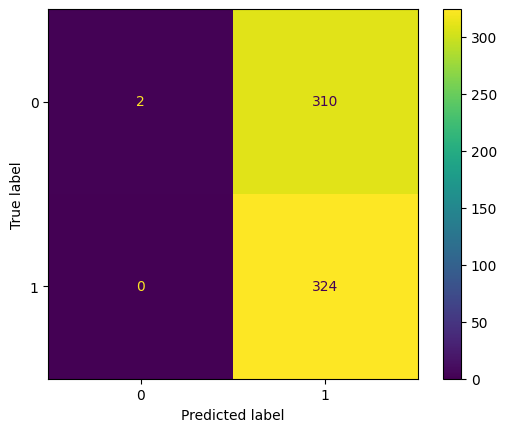

In [ ]:
# Evaluasi menggunakan confusion_matrix pada Train Set dari Sequential API - LSTM Baseline

cm = confusion_matrix(y_train,  y_pred_train_lstsm1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Berdasarkan dari visualisasi `Confusion Matrix - Train Set - Sequential API: LSTM Baseline` menunjukkan bahwa
* Ada `2` pelanggan yang aktualnya adalah tidak suka (`0`) dan benar-benar terprediksi demikian. True Positive
* Ada `310` pelanggan yang aktualnya adalah tidak suka (`0`) tetapi terprediksi sebagai suka (`1`). **False Positive**
* Ada `0` pelanggan yang aktualnya adalah suka (`1`) tetapi terprediksi sebagai tidak suka (`0`). False Negative
* Ada `324` pelanggan yang terprediksi suka (`1`) dan benar-benar terprediksi demikian. True Negative

Klasifikasi model akan berfokus pada False Positive.

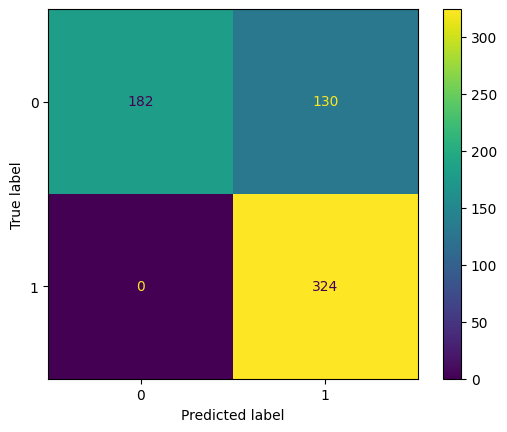

In [ ]:
# Evaluasi menggunakan confusion_matrix pada Train Set dari Sequential API - LSTM Improve

cm = confusion_matrix(y_train, y_pred_train_lstm2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Berdasarkan dari visualisasi `Confusion Matrix - Train Set - Sequential API: LSTM Improvement` menunjukkan bahwa:
* Ada `182` pelanggan yang aktualnya adalah tidak suka (`0`) dan benar-benar terprediksi demikian. True Positive
* Ada `130` pelanggan yang aktualnya adalah tidak suka (`0`) tetapi terprediksi sebagai suka (`1`). **False Positive**
* Ada `0` pelanggan yang aktualnya adalah suka (`1`) tetapi terprediksi sebagai tidak suka (`0`). False Negative
* Ada `324` pelanggan yang terprediksi suka (`1`) dan benar-benar terprediksi demikian. True Negative

Klasifikasi model akan berfokus pada False Positive.

## 8.2 - Test Set

In [ ]:
# Prediksi `y` pada test-set menggunakan Sequential API Model: LSTM Baseline dan Improvement

y_pred_test_lstm1 = model_seq.predict(X_test_arr)
y_pred_test_lstm2 = model_seq2.predict(X_test_arr)

7/7 [==============================] - 0s 8ms/step


In [ ]:
# Mengkonversi y_pred ke dalam kelas 1,0 atau kelas 0 menggunakan numpy

y_pred_test_lstm1 = np.where(y_pred_test_lstm1 >= 0.5, 1, 0)
y_pred_test_lstm2 = np.where(y_pred_test_lstm2 >= 0.5, 1, 0)

In [ ]:
# Evaluasi Test-Set dari model Baseline dan Improvement

print('Classification Report in Test Set on Sequential API - LSTM Baseline:\n', classification_report(y_test, y_pred_test_lstm1))
print('Classification Report in Test Set on Sequential API - LSTM Improve:\n', classification_report(y_test, y_pred_test_lstm2))

Classification Report in Test Set on Sequential API - LSTM Baseline:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.49      1.00      0.66        99

    accuracy                           0.49       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.49      0.33       200

Classification Report in Test Set on Sequential API - LSTM Improve:
               precision    recall  f1-score   support

           0       1.00      0.05      0.09       101
           1       0.51      1.00      0.67        99

    accuracy                           0.52       200
   macro avg       0.75      0.52      0.38       200
weighted avg       0.76      0.52      0.38       200



Berdasarkan hasil `Classification Report - Test Set` menunjukkan bahwa:
> Sequential API: LSTM Baseline

*   `Accuracy Score` adalah sebesar 49%.
*   Pada kasus ulasan pelanggan, akan fokus pada `precision score` karena **False Positive** akan membahayakan restoran dalam menilai pelanggan dan menjalankan bisnisnya.
*   Pada label `0 (tidak suka)` terdapat sebanyak `0` pelanggan yang aktualnya adalah tidak suka. Pada kelas ini, model mengalami gagal prediksi.
*   Pada label `1 (suka)` terdapat sebanyak `49%` pelanggan yang aktualnya adalah suka dan terprediksi sebenarnya, namun sisanya sebanyak 51% adalah pelanggan yang salah prediksi menjadi `tidak suka (0)`.

> Sequential API: LSTM Imrovement

* `Accuracy Score` adalah sebesar 52%.
* Seperti pada baseline model, akan fokus pada `precision score` karena **False Positive** akan membahayakan restoran dalam menilai pelanggan dan menjalankan bisnisnya.
*  Pada label `0 (tidak suka)` terdapat sebanyak `100%` pelanggan yang aktualnya adalah tidak suka namun terprediksi sebenarnya.
*   Pada label `1 (suka)` terdapat sebanyak `51%` pelanggan yang aktualnya adalah suka dan terprediksi sebenarnya, namun sisanya sebanyak 49% adalah pelanggan yang salah prediksi menjadi `tidak suka (0)`.

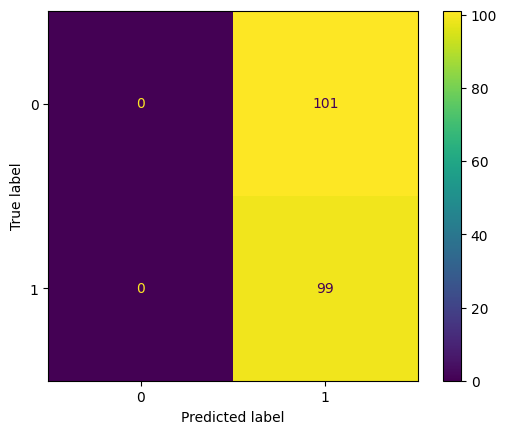

In [ ]:
# Evaluasi menggunakan confusion_matrix pada Test Set dari Sequential API - LSTM Baseline

cm = confusion_matrix(y_test, y_pred_test_lstm1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Berdasarkan dari visualisasi `Confusion Matrix - Test Set - Sequential API: LSTM Baseline` menunjukkan bahwa
* Ada `0` pelanggan yang aktualnya adalah tidak suka (`0`) dan benar-benar terprediksi demikian. Kelas ini mengalami gagal prediksi.
* Ada `101` pelanggan yang aktualnya adalah tidak suka (`0`) tetapi terprediksi sebagai suka (`1`). **False Positive**
* Ada `0` pelanggan yang aktualnya adalah suka (`1`) tetapi terprediksi sebagai tidak suka (`0`). Kelas ini mengalami gagal prediksi.
* Ada `99` pelanggan yang terprediksi suka (`1`) dan benar-benar terprediksi demikian. True Negative

Klasifikasi model akan berfokus pada False Positive.

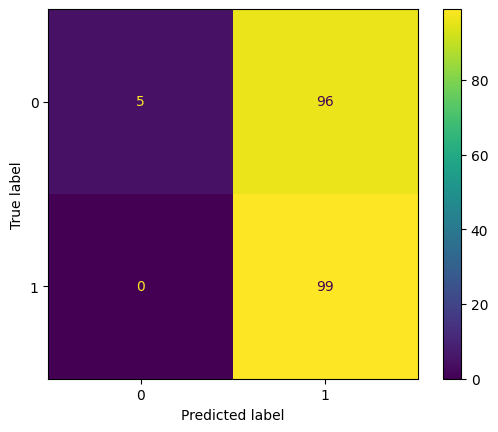

In [ ]:
# Evaluasi menggunakan confusion_matrix pada Test Set dari Sequential API - LSTM Improve

cm = confusion_matrix(y_test, y_pred_test_lstm2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Berdasarkan dari visualisasi `Confusion Matrix - Test Set - Sequential API: LSTM Improve` menunjukkan bahwa
* Ada `5` pelanggan yang aktualnya adalah tidak suka (`0`) dan benar-benar terprediksi demikian. True Positive
* Ada `96` pelanggan yang aktualnya adalah tidak suka (`0`) tetapi terprediksi sebagai suka (`1`). **False Positive**
* Ada `0` pelanggan yang aktualnya adalah suka (`1`) tetapi terprediksi sebagai tidak suka (`0`). False Negative
* Ada `99` pelanggan yang terprediksi suka (`1`) dan benar-benar terprediksi demikian. True Negative

Klasifikasi model akan berfokus pada False Positive.

## 8.3 - Best Model

Berdasarkan hasil Confusion Matrix serta Classification Report pada `Train dan Test-Set`, menunjukkan bahwa model terbaik adalah menggunakan `Model Sequential API: LSTM Improve`. Hal ini bisa dibuktikan dengan:

1.   Skor akurasi pada `Train-Set` adalah 80% dan pada `Test-Set` sebesar 52%. Skor akurasi ini lebih besar dibandingkan dengan Model LSTM Baseline.
2.   Pada Confusion Matrix LSTM Baseline, hasil Test-Setnya mengalami gagal prediksi pada `kelas 0`. Ini menunjukkan model tidak berjalan.
3.   Pada kasus ulasan pelanggan restoran ini, dipilih model yang dapat memprediksi kesalahan yang sedikit. Serta pada kasus ini menggunakan `False Positive` karena jika ada pelanggan yang tidak suka namun terprediksi suka, akan memengaruhi analisa restoran untuk menaikkan penjualan, pelayanan, serta performa restoran itu sendiri.
4.   Model terbaik ini dapat memprediksi kesalahan uji Test-Set (False Positive) sebanyak `96 pelanggan`. Di mana angka prediksi ini lebih sedikit dibandingkan menggunakan LSTM Baseline sebanyak `101 pelanggan`.



# ix. Model Saving

Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [ ]:
# Membuat function untuk melakukan text preprocessing pada DataFrame

def text_proses(review):
  # Mengubah Review ke Lowercase
  review = review.lower()
  
  # Menghilangkan Hashtag
  review = re.sub("#[A-Za-z0-9_]+", " ", review)
  
  # Menghilangkan \n
  review = re.sub(r"\\n", " ",review)
  
  # Menghilangkan Whitespace
  review = review.strip()

  # Menghilangkan Tanda Baca
  review = review.translate(str.maketrans('', '', string.punctuation))

  # Menghilangkan Link
  review = re.sub(r"http\S+", " ", review)
  review = re.sub(r"www.\S+", " ", review)

  # Menghilangkan yang Bukan Huruf seperti Emoji, Simbol Matematika (seperti μ), dst
  review = re.sub("[^A-Za-z\s']", " ", review)

  # Menghilangkan duplicate characters
  review = re.sub("(.)\\1{2,}", "\\1", review)

  # Merapikan Spasi
  review = ' '.join(review.split())

  # Melakukan Tokenisasi
  tokens = word_tokenize(review)

  # Menghilangkan Stopwords
  review = ' '.join([word for word in tokens if word not in stopwords_eng])
  
  # Melakukan Stemming
  review = lanc.stem(review)
  
  return review

In [ ]:
# Freeze Model

model_seq2.trainable = False
model_seq2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 17)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 17, 64)            95488     
                                                                 
 bidirectional (Bidirectiona  (None, 17, 64)           24832     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                        

In [ ]:
# Save ANN Model LSTM Improvement

model_seq2.save('restaurant_review', save_format='tf')

In [ ]:
import zipfile
import os

# Define the name of the zip file
zip_filename = 'restaurant_review.zip'

# Create a zip file object
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zip_obj:
    # Add all the files in the directory to the zip file
    for root, dirs, files in os.walk('customer_review_model2'):
        for file in files:
            zip_obj.write(os.path.join(root, file))

# x. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini dalam format yang asli, bukan data yang sudah di-scaled.

Model Inference dapat dilihat [di sini](https://colab.research.google.com/drive/1EHlUJ0w0A1DkO-qB8rXCf8PHyrx5N26W?usp=sharing).

# xi. Pengambilan Kesimpulan

Bab ini berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

## 11.1 - Model Analysis

1. Label pelanggan yang memberikan ulasan pada restoran adalah label `0: tidak suka` dan label `1: suka`.
2. Modeling menggunakan teknik LSTM menghasilkan model terbaik pada `Sequential API: LSTM Model 2 (Improvement)`. Di mana layer yang digunakan adalah `Bidirectional`. Jika LSTM hanya bisa membaca dalam satu arah, Bidirectional membantu pembacaan model menangkap informasi dari dua arah. Sehingga mampu meningkatkan performa model.
3. Hasil skor pada `Sequential API: LSTM Model 2 (Improvement)` adalah:
* `loss`: 0.659426
* `val_loss`: 0.684838
* `accuracy`: 0.834906
* `val_accuracy`: 0.51250
4. Model terbaik mampu memprediksi kesalahan (False Positive) yang lebih sedikit dibanding Baseline, yaitu sebanyak `96 pelanggan`. 


## 11.2 - Overall Analysis

1. Data target pada dataset `Restaurant_Reviews` memiliki persebaran yang seimbang (`balanced`).
2. Berdasarkan visualisasi dan analisis jumlah kata per *review*, mengindikasikan bahwa pelanggan yang memberikan ulasan negatif (tidak suka), memiliki rata-rata penulisan kata lebih panjang yaitu >6 kata dibandingkan dengan ulasan positif (suka). Hal ini bisa dilihat setelah dilakukan EDA After Preprocessing.
3. Pernyataan pada poin 2, didukung dengan visualisasi menggunakan `heatmap correlation`. Di mana `Liked` dan `word_counts` memmiliki hubungan yang negatif dengan skor `-0.099`, yaitu semakin banyak kata yang ditulis maka memiliki tendesi memuat ulasan negatif. Begitupun sebaliknya.
4. Kata yang sering muncul dalam ulasan pelanggan menunjukkan bahwa kata tersebut adalah fokus pelanggan menilai bar restoran Duck Vegas. Seperti kata makanan (`food`). Hal ini menunjukkan bahwa pelanggan Duck Vegas, ada yang cocok dengan makanannya dan ada yang tidak. Hal ini ditunjukkan pada *review* satuan pelanggan.
5. Data yang akan diprediksi salah adalah seperti kata `food` pada ulasan pelanggan. Kata tersebut memiliki dua makna, bisa jadi pelanggan merasa puas dan bisa jadi pelanggan merasa tidak puas dengan makanannya dalam segi penyajian yang kurang steril, bahan baku tidak segar, dan makanan yang kebetulan memiliki kualitas rasa menurutn saat pelanggan tersebut menerima.

## 11.3 - Implementasi Bisnis

Berdasarkan hasil analisis di atas, bar restoran `Duck Vegas` ini bisa evaluasi performa pelayanan dan makanannya berdasarkan ulasan pelanggan. Duck Vegas bisa mengimplementasikan:

1. Meningkatkan mutu bahan baku makanan serta kebersihan pengolahan.
2. Meningkatkan pelayanan, baik itu saat pelanggan datang, makan, dan pulang.

Hal ini sesuai dengan pernyataan [Nielasari et al (2021)](http://pub.unj.ac.id/index.php/jbmk/article/view/309/297), bahwa faktor  yang  mempengaruhi *Customer Satisfaction* yaitu 
* *Service Quality* (kualitas pelayanan)
* *Price* (harga)
* *Product* (produk)
* Lokasi dan *Brand Image*

Salah satu faktor utama *Customer Satisfaction* ialah pemilik restoran harus meningkatkan Service Qualitydari pramusaji (Raharjo & Amboningtyas, 2017). Seperti memperhatikan kebersihan dan kerapihan pramusaji, keramahan pramusaji, dan ketepatan dalam menyajikan pesanan.

## 11.4 - Model Improvement

Model Improvement untuk studi selanjutnya adalah dapat menggunakan teknik GRU sehingga dapat membandingkan model, menambah jumlah layer, menggunakan callback, dan transfer learning.

Pada model yang digunakan sekarang hanya terbatas menggunakan Sequential API dan LSTM, sehingga hasil yang diperoleh kurang maksimal. [Kelemahan](https://www.trivusi.web.id/2022/07/algoritma-lstm.html#:~:text=Sedangkan%20kekurangan%20dari%20LSTM%2C%20yaitu,Cenderung%20terjadi%20masalah%20overfitting.) model ini adalah terjadi peningkatan kompleksitas komputasi karena lebih banyak parameter untuk dipelajari. Memori yang dibutuhkan lebih tinggi daripada RNN konvensional karena adanya beberapa memori cell. Cenderung terjadi masalah overfitting. Hal ini bisa dilihat pada hasil Baseline dan Improvement yang cenderung masih overfit.